In [1]:
import pandas as pd
base = pd.read_csv("dengue_sinan.csv")

C:\Users\elisa\AppData\Local\Temp\ipykernel_19820\1414323177.py:2: DtypeWarning: Columns (30,31,53,54,55,59,61,63,65,71,83,89,100,116,131,137) have mixed types. Specify dtype option on import or set low_memory=False.
  base = pd.read_csv("dengue_sinan.csv")


In [6]:
display(base)

,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,...,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H,CS_FLXRET,FLXRECEBI,IDENT_MICR,MIGRADO_W,ID_CNS_SUS_HASHED
0,158,2,A90,2016-03-05,201609,2016,29,292210,1381.0,2498731.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
1,298,2,A90,2016-02-15,201607,2016,29,293290,1385.0,3280969.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,ebc774c2fc9be73f8d403772dc14539dbe6e448e117f62...
2,5082,2,A90,2016-03-25,201612,2016,29,293250,1385.0,2800527.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,e0f037bc45eeea73df919230256055724a0bc45b990d62...
3,111262,2,A90,2016-03-24,201612,2016,29,291360,1385.0,2706628.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
4,166,2,A90,2016-03-13,201611,2016,29,292210,1381.0,2498731.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,595d3ab2cc2bfc76ee1e9ef090ac6abf0e7b64aee90e92...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620206,7061,2,A90,2024-02-21,202408,2024,29,292300,1388.0,2506254.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,4ca7df06d628b3ec9fcf8f4a3a8b11661f5e98b8e54b34...
620207,1257,2,A90,2024-03-04,202410,2024,29,291980,1398.0,7175973.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,5152560db10a8bc76f1490909a74620605b6f3b512e8d7...
620208,372024,2,A90,2024-01-26,202404,2024,29,292303,1381.0,6540007.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,d7c7bebe87009f4f9e4a606f6fe2ddc83a67ea3c48ada8...
620209,128,2,A90,2024-02-19,202408,2024,29,291400,1381.0,2824558.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...


In [7]:
base.nunique()

NU_NOTIFIC           185124
TP_NOT                    2
ID_AGRAVO                 1
DT_NOTIFIC             3015
SEM_NOT                 432
                      ...  
CS_FLXRET                 2
FLXRECEBI                 0
IDENT_MICR                7
MIGRADO_W                 0
ID_CNS_SUS_HASHED    339941
Length: 148, dtype: int64

In [2]:
numeric_df = base.select_dtypes(include=['int','float'])
correlation_matrix = numeric_df.corr()
target_correlations = correlation_matrix['CLASSI_FIN'].sort_values(ascending=False)
display(target_correlations)



In [5]:
base[['EPISTAXE','PLASMATICO']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620211 entries, 0 to 620210
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EPISTAXE    2 non-null      float64
 1   PLASMATICO  3 non-null      float64
dtypes: float64(2)
memory usage: 9.5 MB


In [3]:
import seaborn as sns

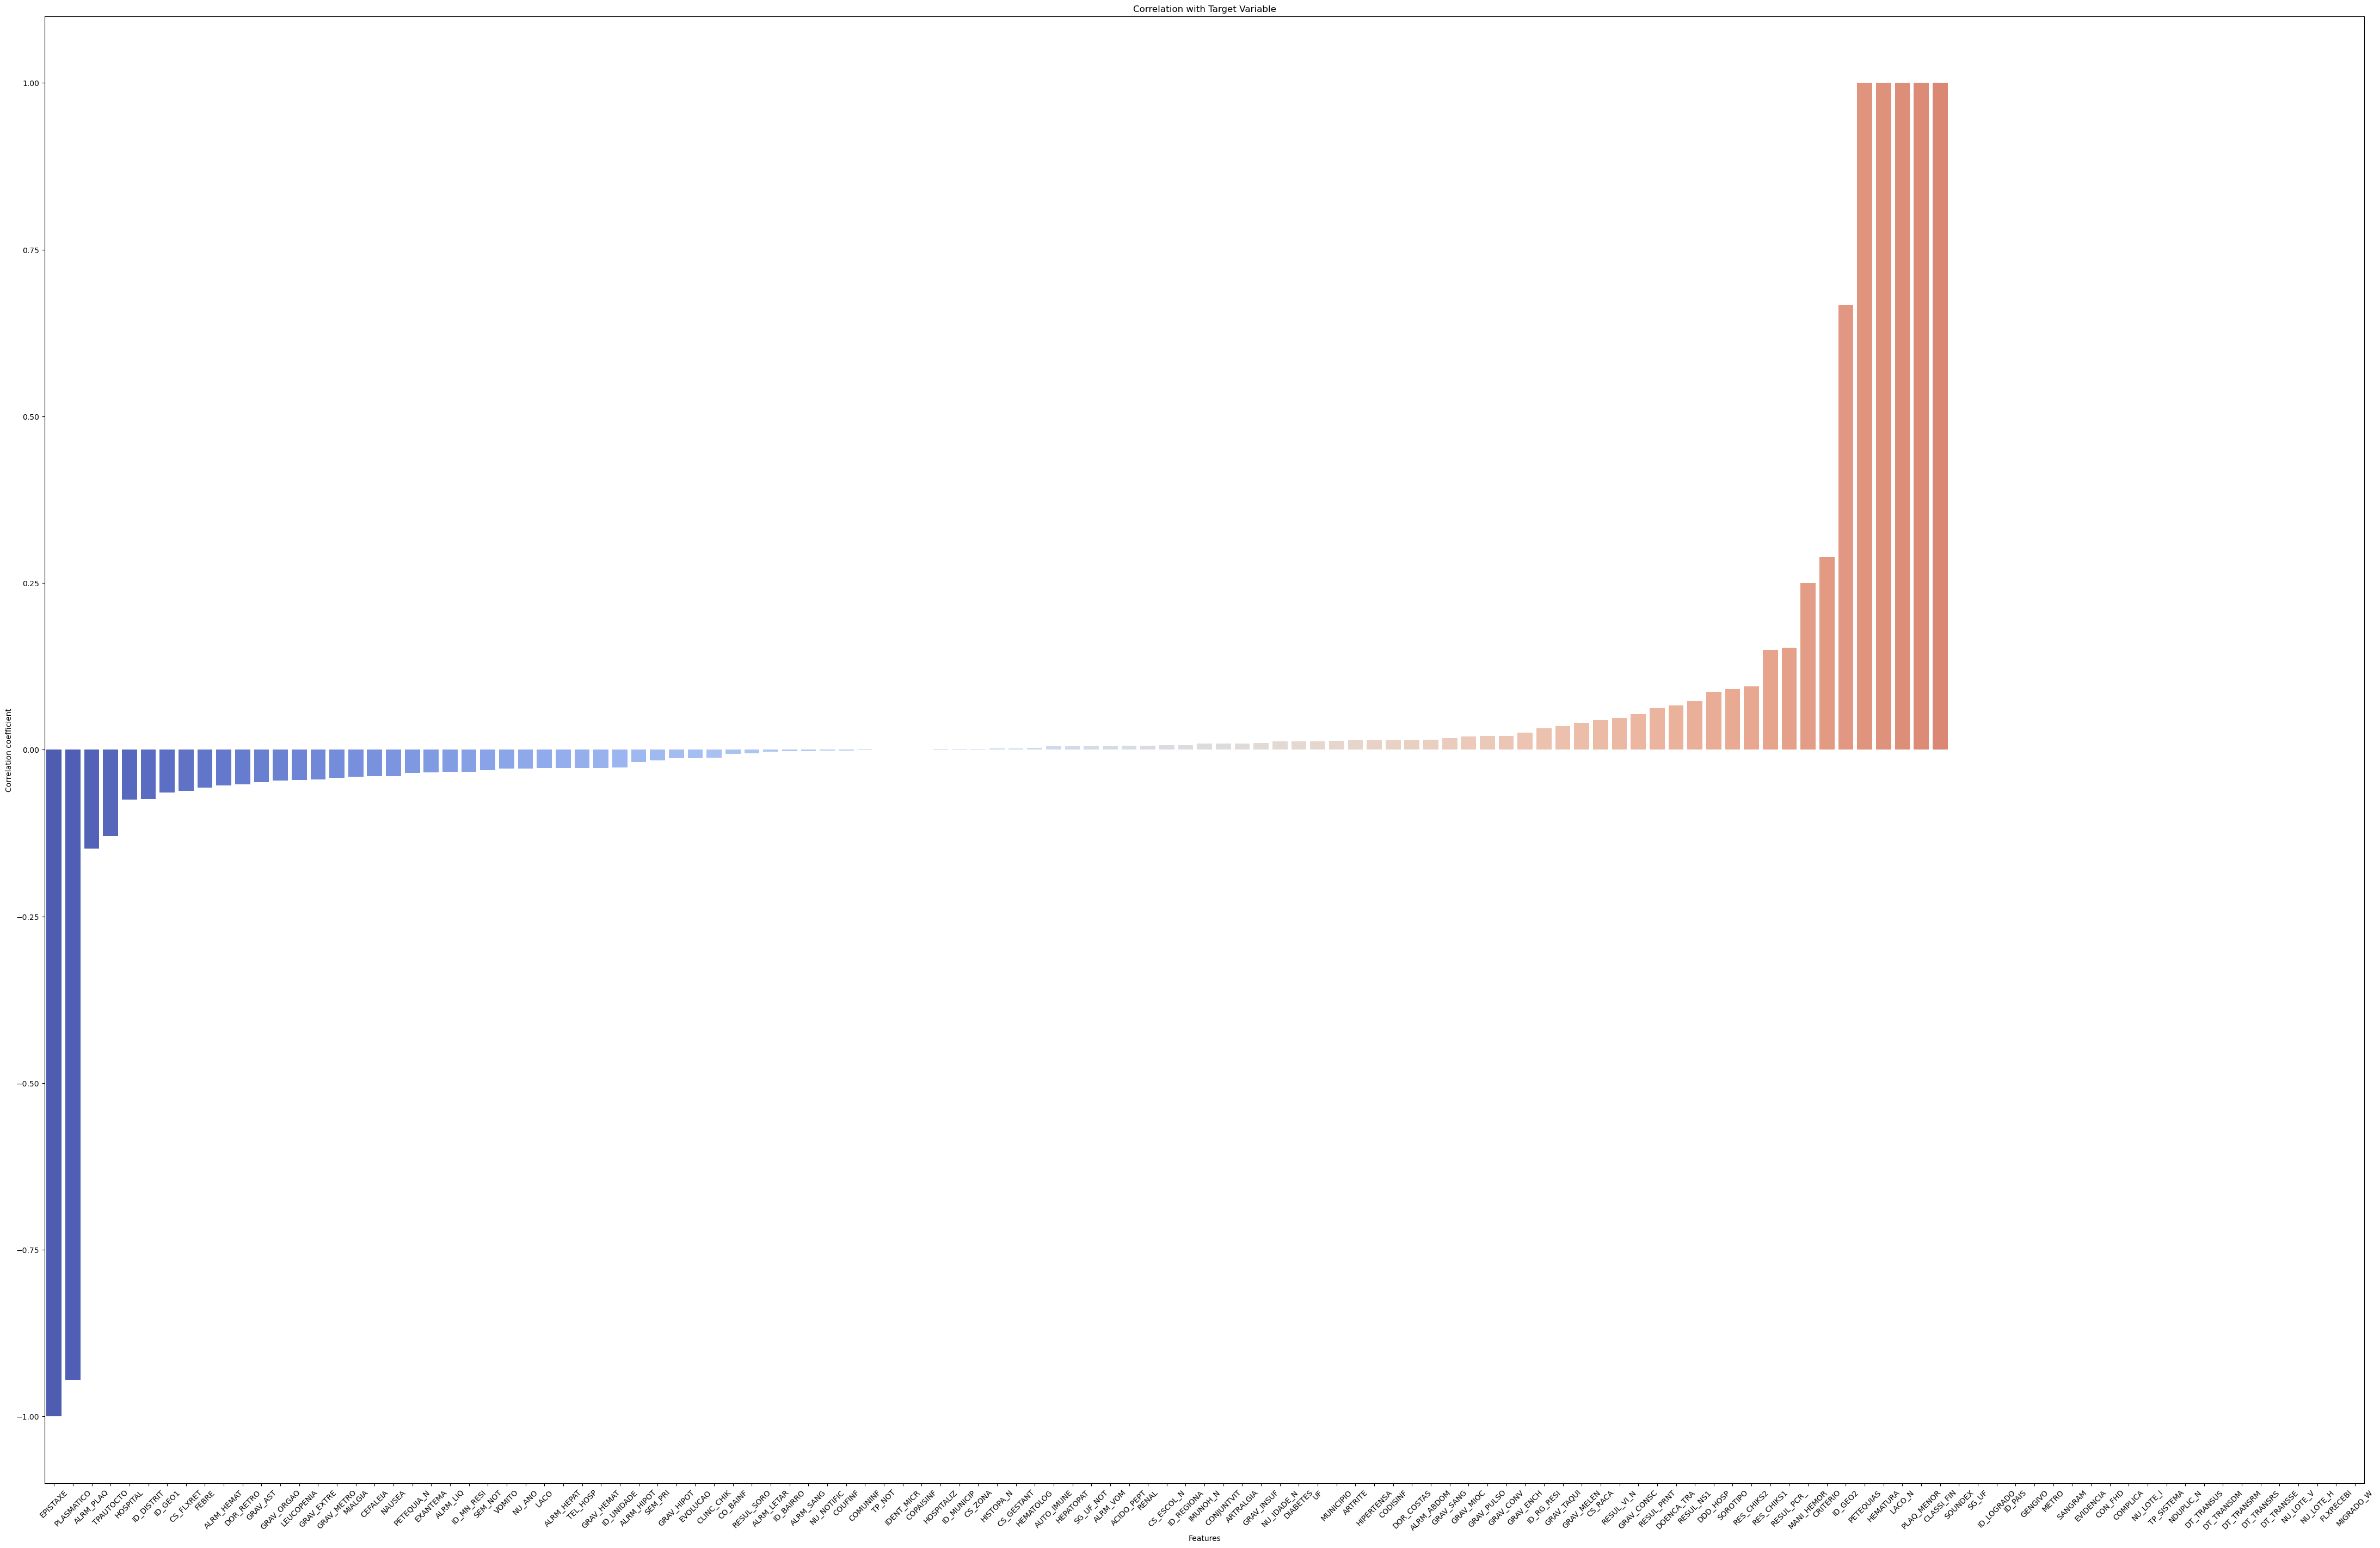

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(55,35))
sns.barplot(x=target_correlations.index, y=target_correlations.values, palette='coolwarm')
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.xticks(rotation=45)
plt.show()


In [5]:
novabase = base[[
    "DT_INVEST",
    "FEBRE",
    "MIALGIA",
    "CEFALEIA",
    "EXANTEMA",
    "VOMITO",
    "NAUSEA",
    "DOR_COSTAS",
    "CONJUNTVIT",
    "ARTRITE",
    "ARTRALGIA",
    "PETEQUIA_N",
    "LEUCOPENIA",
    "LACO",
    "DOR_RETRO",
    "DIABETES",
    "HEMATOLOG",
    "HEPATOPAT",
    "RENAL",
    "HIPERTENSA",
    "ACIDO_PEPT",
    "AUTO_IMUNE",
    'RES_CHIKS2','RES_CHIKS1','SOROTIPO','RESUL_PRNT','RESUL_SORO','RESUL_NS1',
    'RESUL_VI_N','HISTOPA_N','IMUNOH_N','HOSPITALIZ','TPAUTOCTO','COUFINF','COPAISINF','COMUNINF','CO_BAINF','CLASSI_FIN','RESUL_PCR_','CODISINF'
 ]].copy()


In [12]:
novabase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620211 entries, 0 to 620210
Data columns (total 40 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DT_INVEST   555845 non-null  object 
 1   FEBRE       540788 non-null  float64
 2   MIALGIA     540788 non-null  float64
 3   CEFALEIA    540788 non-null  float64
 4   EXANTEMA    540788 non-null  float64
 5   VOMITO      540788 non-null  float64
 6   NAUSEA      540788 non-null  float64
 7   DOR_COSTAS  540788 non-null  float64
 8   CONJUNTVIT  540788 non-null  float64
 9   ARTRITE     540788 non-null  float64
 10  ARTRALGIA   540788 non-null  float64
 11  PETEQUIA_N  540788 non-null  float64
 12  LEUCOPENIA  540788 non-null  float64
 13  LACO        540788 non-null  float64
 14  DOR_RETRO   540788 non-null  float64
 15  DIABETES    540788 non-null  float64
 16  HEMATOLOG   540788 non-null  float64
 17  HEPATOPAT   540788 non-null  float64
 18  RENAL       540788 non-null  float64
 19  HI

In [13]:
novabase.nunique()

DT_INVEST     3015
FEBRE            2
MIALGIA          2
CEFALEIA         2
EXANTEMA         2
VOMITO           2
NAUSEA           2
DOR_COSTAS       2
CONJUNTVIT       2
ARTRITE          2
ARTRALGIA        2
PETEQUIA_N       2
LEUCOPENIA       2
LACO             2
DOR_RETRO        2
DIABETES         2
HEMATOLOG        2
HEPATOPAT        2
RENAL            2
HIPERTENSA       2
ACIDO_PEPT       2
AUTO_IMUNE       2
RES_CHIKS2       4
RES_CHIKS1       4
SOROTIPO         4
RESUL_PRNT       4
RESUL_SORO       4
RESUL_NS1        4
RESUL_VI_N       4
HISTOPA_N        4
IMUNOH_N         4
HOSPITALIZ       3
TPAUTOCTO        3
COUFINF         18
COPAISINF        3
COMUNINF       477
CO_BAINF       594
CLASSI_FIN       7
RESUL_PCR_       4
CODISINF        25
dtype: int64

In [7]:
novabase_numerica = novabase.select_dtypes(include=['number'])
matrizcorrelacao = novabase_numerica.corr()
targetcorrelacoes = matrizcorrelacao['CLASSI_FIN'].sort_values(ascending=False)
display(targetcorrelacoes)

CLASSI_FIN    1.000000
RESUL_PCR_    0.153104
RES_CHIKS1    0.149527
RES_CHIKS2    0.095022
SOROTIPO      0.091337
RESUL_NS1     0.072657
RESUL_PRNT    0.062440
RESUL_VI_N    0.048121
DOR_COSTAS    0.014553
CODISINF      0.014409
HIPERTENSA    0.014318
ARTRITE       0.013890
DIABETES      0.012680
ARTRALGIA     0.009648
CONJUNTVIT    0.009646
IMUNOH_N      0.009227
RENAL         0.006039
ACIDO_PEPT    0.005757
HEPATOPAT     0.004964
AUTO_IMUNE    0.004942
HEMATOLOG     0.002542
HISTOPA_N     0.001845
HOSPITALIZ    0.000865
COPAISINF     0.000768
COMUNINF     -0.000096
COUFINF      -0.001567
RESUL_SORO   -0.005334
CO_BAINF     -0.006528
LACO         -0.027422
VOMITO       -0.028199
EXANTEMA     -0.033685
PETEQUIA_N   -0.034735
NAUSEA       -0.039242
CEFALEIA     -0.039432
MIALGIA      -0.040121
LEUCOPENIA   -0.045325
DOR_RETRO    -0.051832
FEBRE        -0.056944
TPAUTOCTO    -0.129126
Name: CLASSI_FIN, dtype: float64

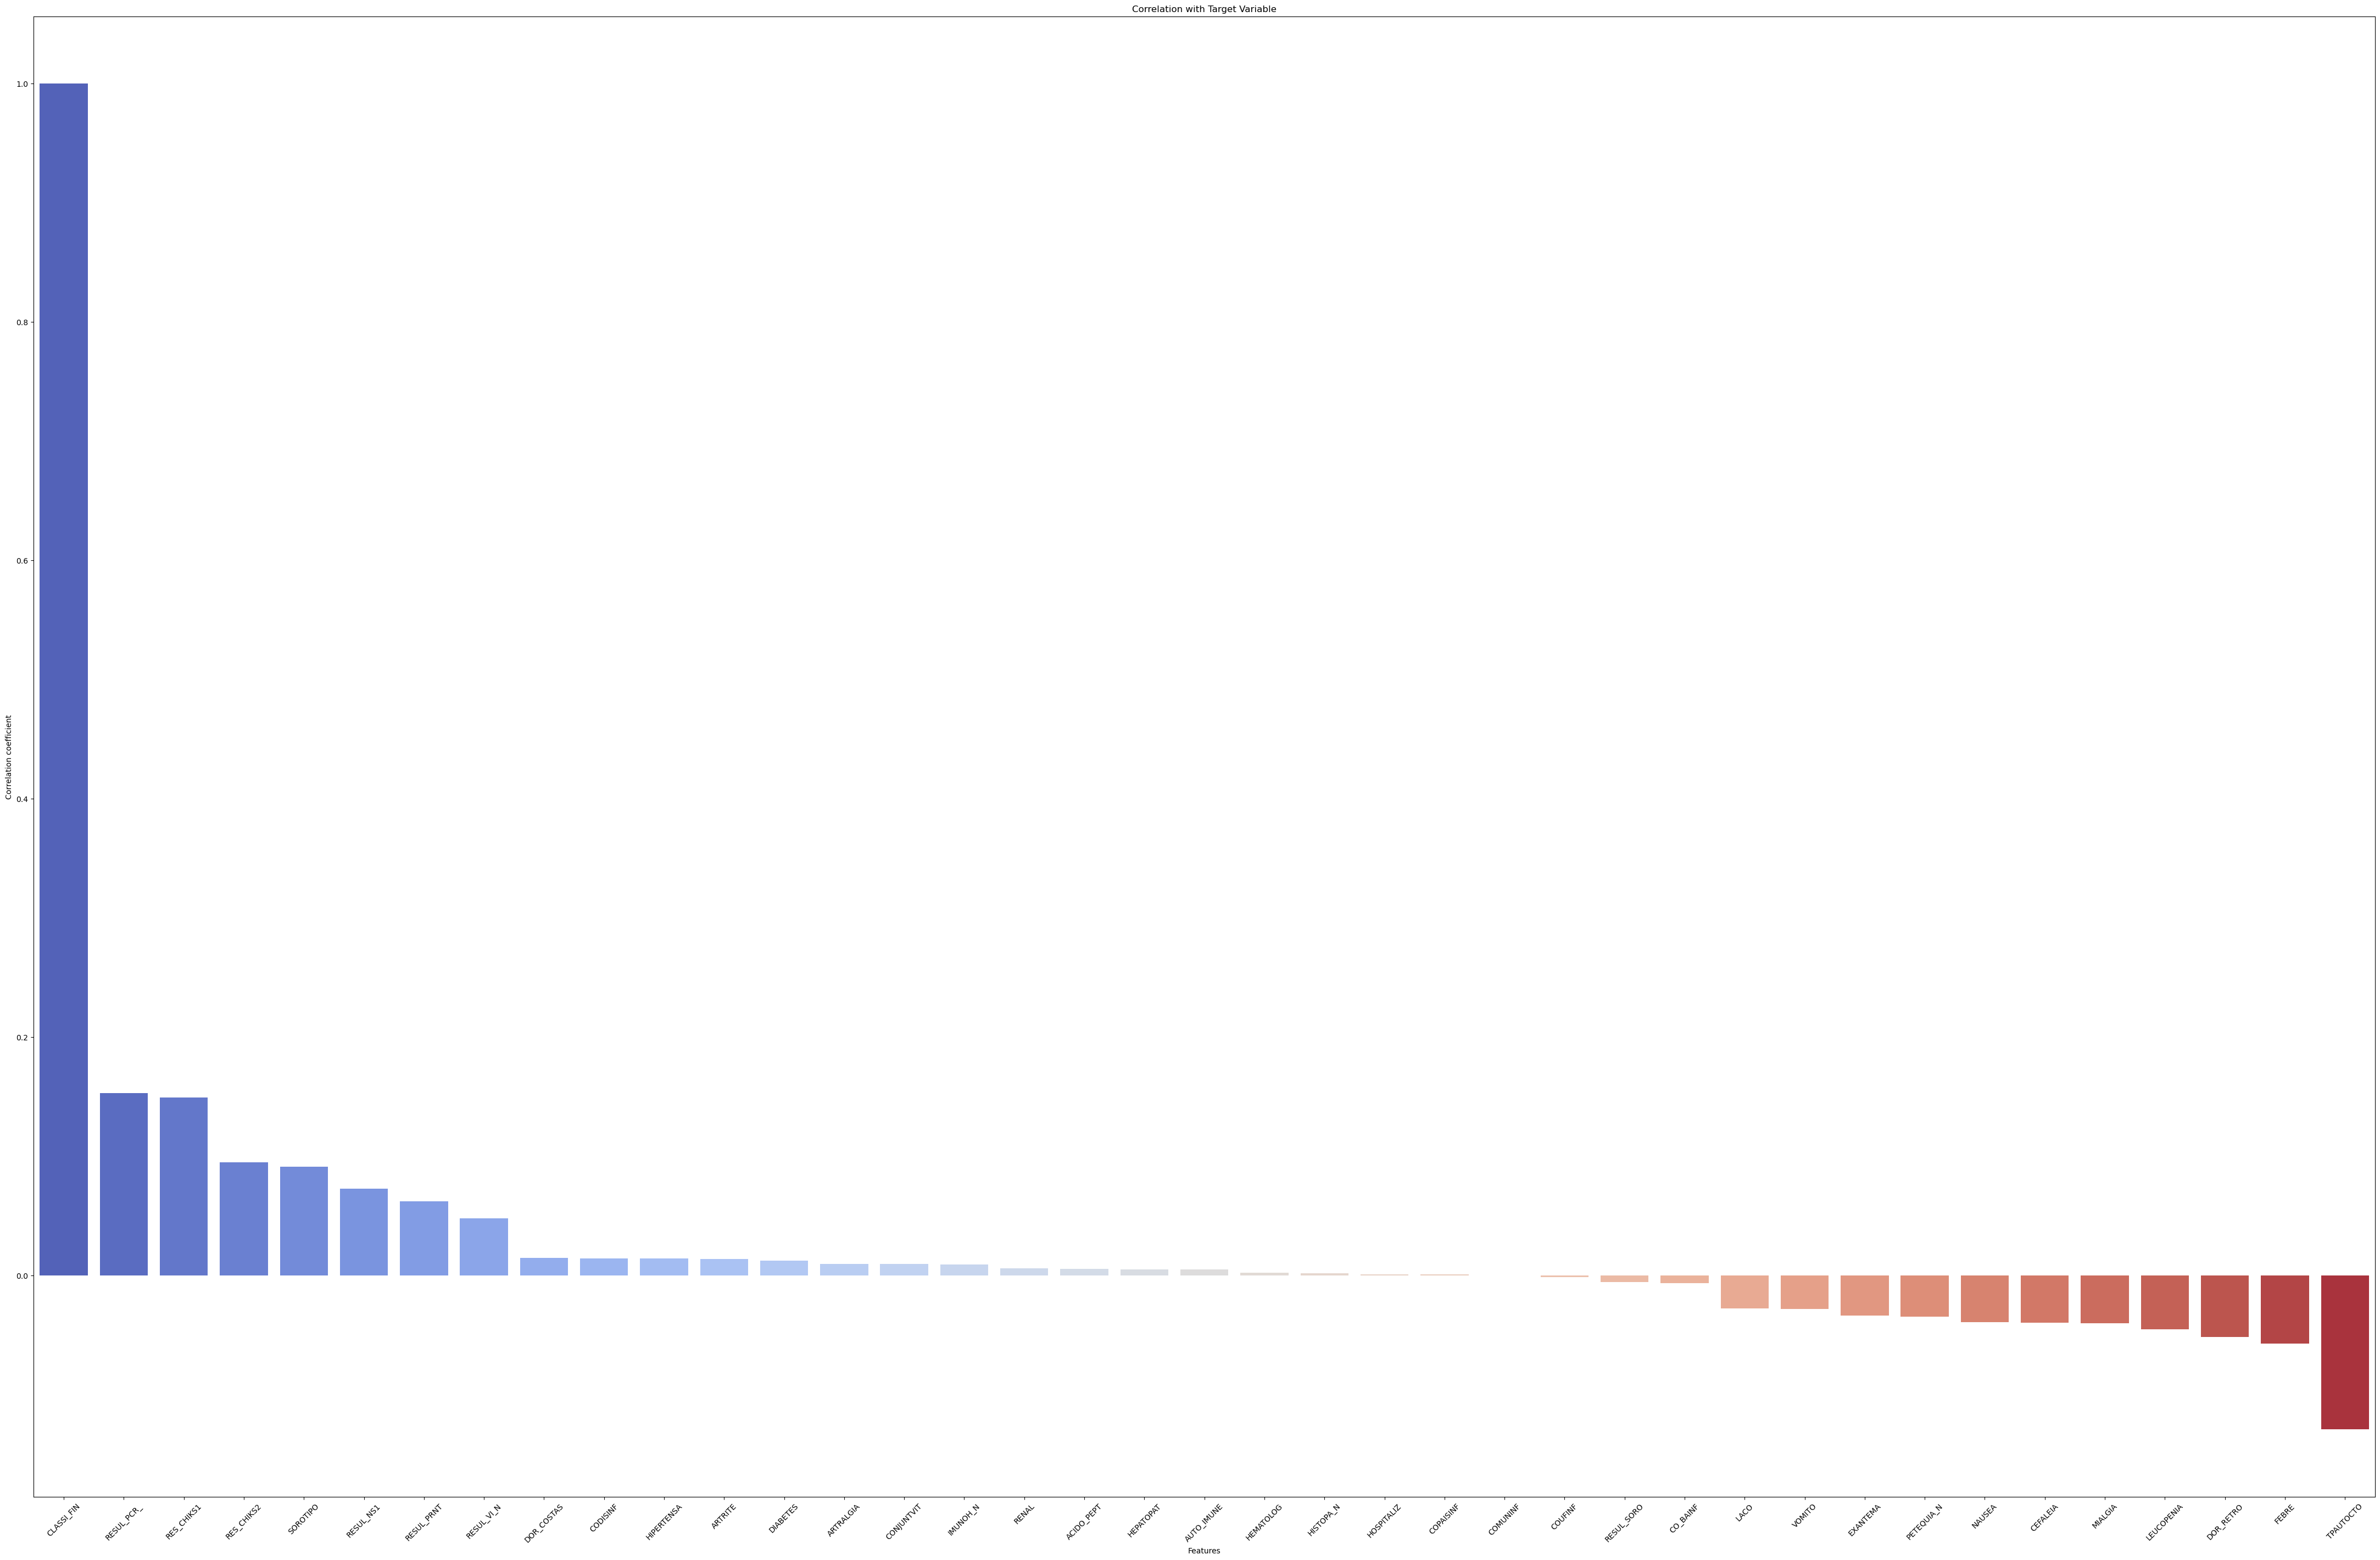

In [15]:
plt.figure(figsize=(55,35))
sns.barplot(x=targetcorrelacoes.index, y=targetcorrelacoes.values, palette='coolwarm')
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.xticks(rotation=45)
plt.show()

In [16]:
numeric_df = novabase.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
display(correlation_matrix['CLASSI_FIN'])



FEBRE        -0.056944
MIALGIA      -0.040121
CEFALEIA     -0.039432
EXANTEMA     -0.033685
VOMITO       -0.028199
NAUSEA       -0.039242
DOR_COSTAS    0.014553
CONJUNTVIT    0.009646
ARTRITE       0.013890
ARTRALGIA     0.009648
PETEQUIA_N   -0.034735
LEUCOPENIA   -0.045325
LACO         -0.027422
DOR_RETRO    -0.051832
DIABETES      0.012680
HEMATOLOG     0.002542
HEPATOPAT     0.004964
RENAL         0.006039
HIPERTENSA    0.014318
ACIDO_PEPT    0.005757
AUTO_IMUNE    0.004942
RES_CHIKS2    0.095022
RES_CHIKS1    0.149527
SOROTIPO      0.091337
RESUL_PRNT    0.062440
RESUL_SORO   -0.005334
RESUL_NS1     0.072657
RESUL_VI_N    0.048121
HISTOPA_N     0.001845
IMUNOH_N      0.009227
HOSPITALIZ    0.000865
TPAUTOCTO    -0.129126
COUFINF      -0.001567
COPAISINF     0.000768
COMUNINF     -0.000096
CO_BAINF     -0.006528
CLASSI_FIN    1.000000
RESUL_PCR_    0.153104
CODISINF      0.014409
Name: CLASSI_FIN, dtype: float64

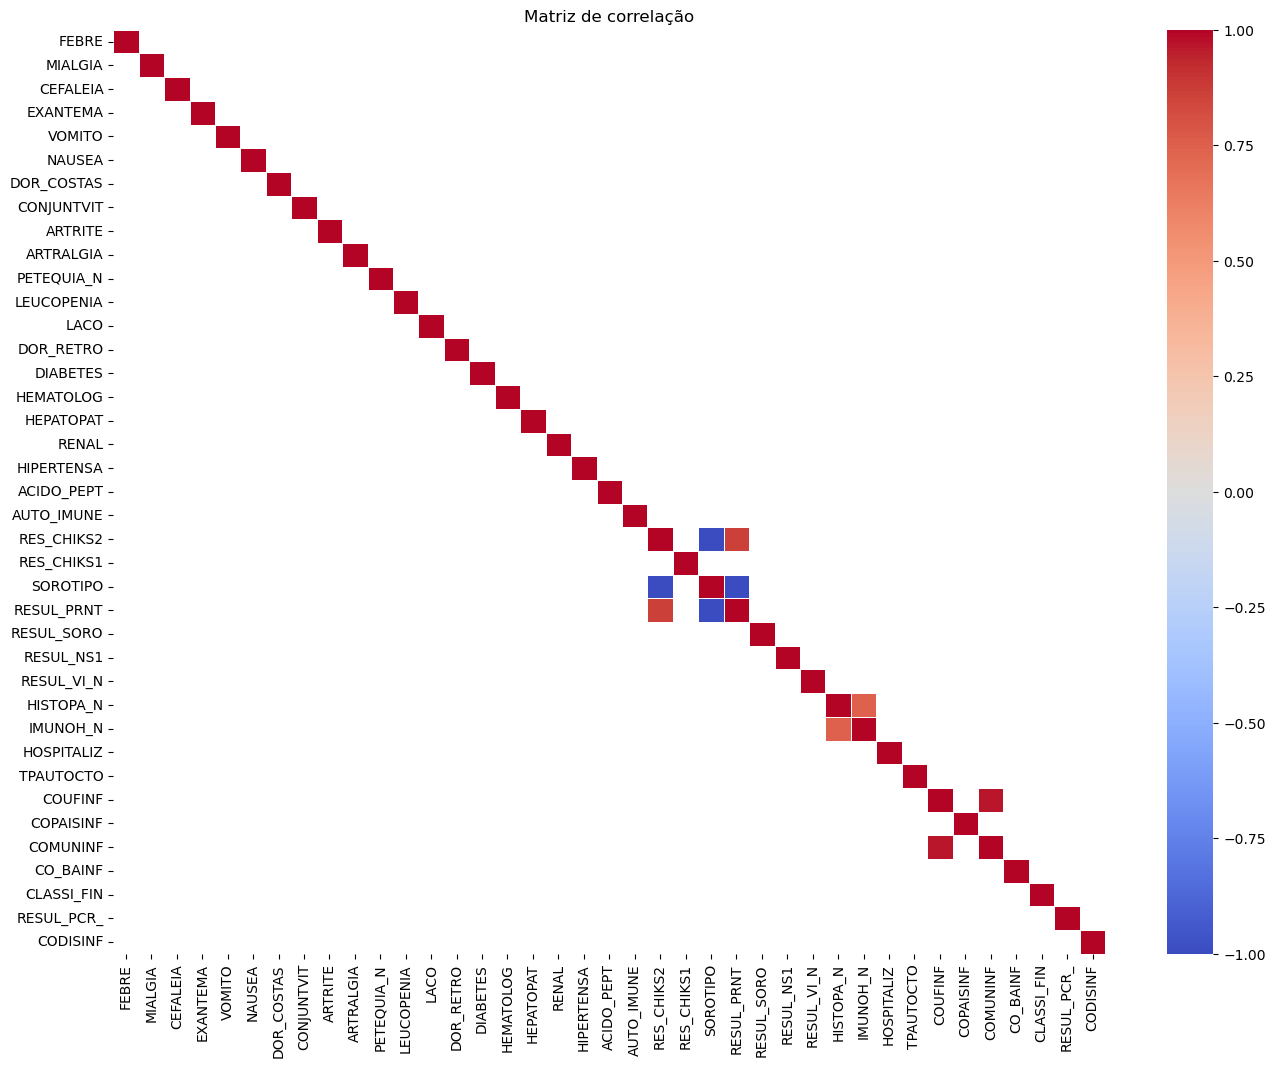

In [17]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix[(correlation_matrix >= 0.7) | (correlation_matrix <= -0.5)], annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlação')
plt.show()

In [18]:
novabase.describe()

,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,...,IMUNOH_N,HOSPITALIZ,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CO_BAINF,CLASSI_FIN,RESUL_PCR_,CODISINF
count,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,...,140095.000000,315799.000000,173415.000000,157206.000000,157225.000000,156213.000000,4.344800e+04,549797.000000,174076.000000,5345.000000
mean,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,1.959823,1.893396,1.729715,...,3.989086,2.279073,1.182574,29.006107,1.001177,291744.244775,6.215275e+02,7.937175,3.768521,153.961085
std,0.346910,0.440871,0.424991,0.396011,0.429439,0.470291,0.446099,0.196373,0.308609,0.444108,...,0.144132,1.575854,0.540230,0.389308,0.398159,3545.189290,5.852071e+04,2.089415,0.694806,204.704164
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,15.000000,1.000000,150125.000000,1.000000e+00,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,4.000000,2.000000,1.000000,29.000000,1.000000,291072.000000,1.800000e+01,5.000000,4.000000,50.000000
50%,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,2.000000,1.000000,29.000000,1.000000,291480.000000,8.000000e+01,8.000000,4.000000,52.000000
75%,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,2.000000,1.000000,29.000000,1.000000,292530.000000,2.140000e+02,10.000000,4.000000,54.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,9.000000,3.000000,53.000000,156.000000,539904.000000,1.111111e+07,12.000000,4.000000,563.000000


In [19]:
novabase[[  "FEBRE",
    "MIALGIA",
    "CEFALEIA",
    "EXANTEMA",
    "VOMITO",
    "NAUSEA",
    "DOR_COSTAS",
    "CONJUNTVIT",
    "ARTRITE",
    "ARTRALGIA",
    "PETEQUIA_N",
    "LEUCOPENIA",
    "LACO",
    "DOR_RETRO",
    "DIABETES",
    "HEMATOLOG",
    "HEPATOPAT",
    "RENAL",
    "HIPERTENSA",
    "ACIDO_PEPT",
    "AUTO_IMUNE"]].value_counts()

FEBRE  MIALGIA  CEFALEIA  EXANTEMA  VOMITO  NAUSEA  DOR_COSTAS  CONJUNTVIT  ARTRITE  ARTRALGIA  PETEQUIA_N  LEUCOPENIA  LACO  DOR_RETRO  DIABETES  HEMATOLOG  HEPATOPAT  RENAL  HIPERTENSA  ACIDO_PEPT  AUTO_IMUNE
1.0    1.0      1.0       2.0       2.0     2.0     2.0         2.0         2.0      2.0        2.0         2.0         2.0   2.0        2.0       2.0        2.0        2.0    2.0         2.0         2.0           53648
2.0    2.0      2.0       2.0       2.0     2.0     2.0         2.0         2.0      2.0        2.0         2.0         2.0   2.0        2.0       2.0        2.0        2.0    2.0         2.0         2.0           15898
1.0    1.0      1.0       2.0       2.0     2.0     2.0         2.0         2.0      2.0        2.0         2.0         2.0   1.0        2.0       2.0        2.0        2.0    2.0         2.0         2.0           14991
                                                                                     1.0        2.0         2.0         2.0   2.0

In [8]:
for column in novabase_numerica.columns:
        if novabase_numerica[column].dtype == 'float64' or novabase_numerica[column].dtype == 'int64':
            novabase_numerica[column].fillna(novabase_numerica[column].mode()[0], inplace=True)

In [21]:
novabase['ACIDO_PEPT'].value_counts()

ACIDO_PEPT
2.0    616301
1.0      3910
Name: count, dtype: int64

In [23]:
novabase[[  "FEBRE",
    "MIALGIA",
    "CEFALEIA",
    "EXANTEMA",
    "VOMITO",
    "NAUSEA",
    "DOR_COSTAS",
    "CONJUNTVIT",
    "ARTRITE",
    "ARTRALGIA",
    "PETEQUIA_N",
    "LEUCOPENIA",
    "LACO",
    "DOR_RETRO",
    "DIABETES",
    "HEMATOLOG",
    "HEPATOPAT",
    "RENAL",
    "HIPERTENSA",
    "ACIDO_PEPT",
    "AUTO_IMUNE"]].isnull().sum()

FEBRE         0
MIALGIA       0
CEFALEIA      0
EXANTEMA      0
VOMITO        0
NAUSEA        0
DOR_COSTAS    0
CONJUNTVIT    0
ARTRITE       0
ARTRALGIA     0
PETEQUIA_N    0
LEUCOPENIA    0
LACO          0
DOR_RETRO     0
DIABETES      0
HEMATOLOG     0
HEPATOPAT     0
RENAL         0
HIPERTENSA    0
ACIDO_PEPT    0
AUTO_IMUNE    0
dtype: int64

In [24]:
novabase[[
    "SOROTIPO",
    "RES_CHIKS1",
    "RES_CHIKS2",
    "RESUL_PRNT",
    "RESUL_SORO",
    "RESUL_NS1",
    "RESUL_VI_N",
    "HISTOPA_N",
    "IMUNOH_N",
    "TPAUTOCTO",
    "COUFINF",
    "COPAISINF",
    "COMUNINF",
    "CODISINF",
    "CO_BAINF",
    "NOBAIINF"
]].isnull().sum()

KeyError: "['NOBAIINF'] not in index"

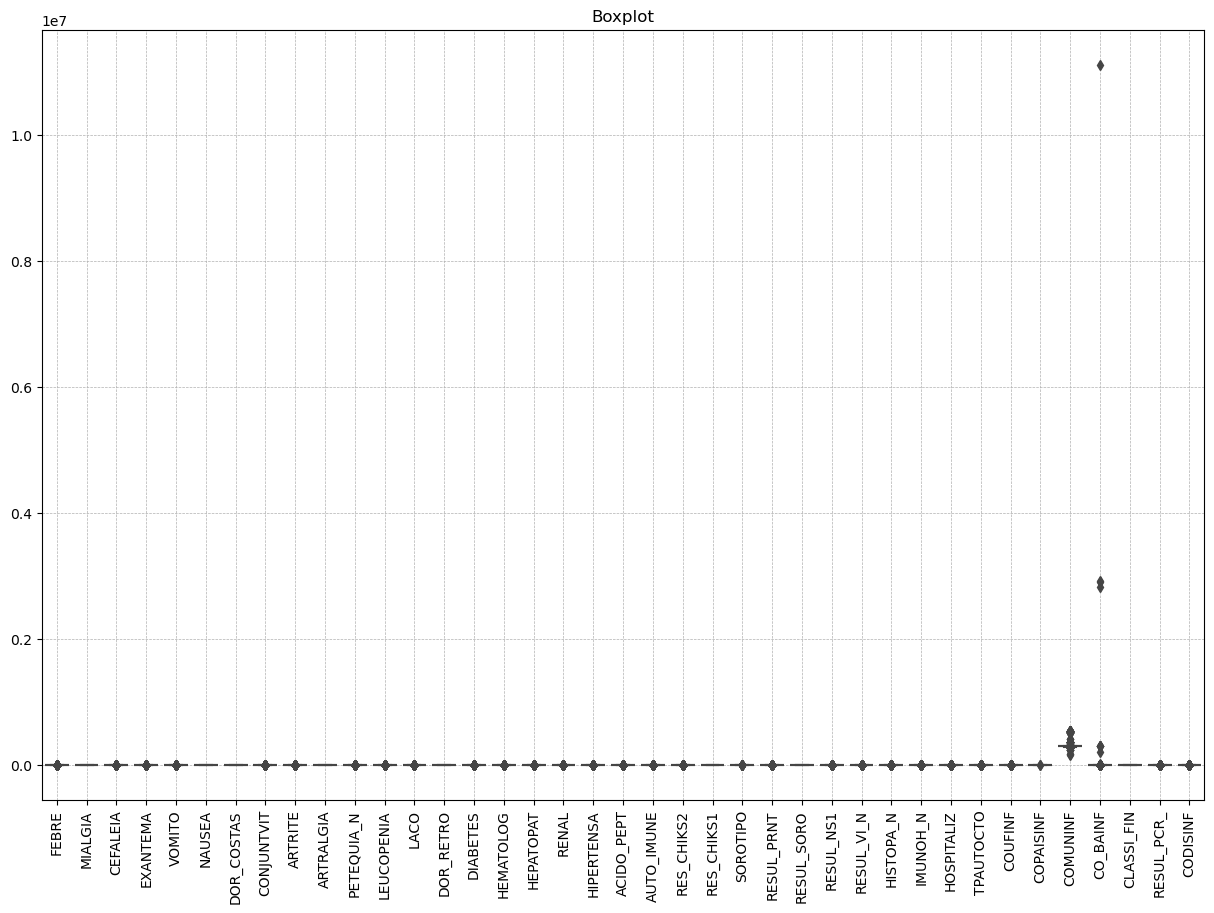

In [25]:
plt.figure(figsize=(15, 10))
sns.boxplot(data= novabase_numerica)
plt.xticks(rotation=90)
plt.title('Boxplot')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(rotation=90)
plt.show()

In [26]:
novabase_numerica.describe()

,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,...,IMUNOH_N,HOSPITALIZ,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CO_BAINF,CLASSI_FIN,RESUL_PCR_,CODISINF
count,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,...,140095.000000,315799.000000,173415.000000,157206.000000,157225.000000,156213.000000,4.344800e+04,549797.000000,174076.000000,5345.000000
mean,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,1.959823,1.893396,1.729715,...,3.989086,2.279073,1.182574,29.006107,1.001177,291744.244775,6.215275e+02,7.937175,3.768521,153.961085
std,0.346910,0.440871,0.424991,0.396011,0.429439,0.470291,0.446099,0.196373,0.308609,0.444108,...,0.144132,1.575854,0.540230,0.389308,0.398159,3545.189290,5.852071e+04,2.089415,0.694806,204.704164
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,15.000000,1.000000,150125.000000,1.000000e+00,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,4.000000,2.000000,1.000000,29.000000,1.000000,291072.000000,1.800000e+01,5.000000,4.000000,50.000000
50%,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,2.000000,1.000000,29.000000,1.000000,291480.000000,8.000000e+01,8.000000,4.000000,52.000000
75%,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,2.000000,1.000000,29.000000,1.000000,292530.000000,2.140000e+02,10.000000,4.000000,54.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,9.000000,3.000000,53.000000,156.000000,539904.000000,1.111111e+07,12.000000,4.000000,563.000000


In [27]:
novabase

,DT_INVEST,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,...,IMUNOH_N,HOSPITALIZ,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CO_BAINF,CLASSI_FIN,RESUL_PCR_,CODISINF
0,2016-03-05,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,4.0,2.0,1.0,29.0,1.0,291480.0,19.0,8.0,4.0,50.0
1,2016-02-15,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,4.0,2.0,1.0,29.0,1.0,291480.0,19.0,8.0,4.0,50.0
2,2016-03-25,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,4.0,2.0,1.0,29.0,1.0,293250.0,19.0,10.0,4.0,50.0
3,2016-03-24,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,4.0,2.0,1.0,29.0,1.0,291480.0,19.0,10.0,4.0,50.0
4,2016-03-13,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,4.0,2.0,1.0,29.0,1.0,291480.0,19.0,8.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620206,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,4.0,2.0,1.0,29.0,1.0,291480.0,19.0,10.0,4.0,50.0
620207,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,4.0,2.0,1.0,29.0,1.0,291480.0,19.0,10.0,4.0,50.0
620208,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,4.0,2.0,1.0,29.0,1.0,291480.0,19.0,8.0,4.0,50.0
620209,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,4.0,2.0,1.0,29.0,1.0,291480.0,19.0,10.0,4.0,50.0


In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder 

In [10]:
label_encoder = preprocessing.LabelEncoder()
for coluna in novabase_numerica.columns:
    novabase_numerica[coluna] = label_encoder.fit_transform(novabase_numerica[coluna])

In [11]:
pd.DataFrame(novabase_numerica)

,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,...,IMUNOH_N,HOSPITALIZ,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CO_BAINF,CLASSI_FIN,RESUL_PCR_,CODISINF
0,0,0,0,1,1,1,1,1,1,1,...,3,1,0,8,0,194,18,3,3,14
1,0,0,0,1,1,1,1,1,1,1,...,3,1,0,8,0,194,18,3,3,14
2,1,0,0,1,1,1,1,1,1,0,...,3,1,0,8,0,417,18,4,3,14
3,0,0,0,1,1,1,1,1,1,1,...,3,1,0,8,0,194,18,4,3,14
4,0,0,0,1,1,1,1,1,1,1,...,3,1,0,8,0,194,18,3,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620206,0,0,0,1,1,1,1,1,1,1,...,3,1,0,8,0,194,18,4,3,14
620207,0,0,0,1,1,1,1,1,1,1,...,3,1,0,8,0,194,18,4,3,14
620208,0,0,0,1,1,1,1,1,1,1,...,3,1,0,8,0,194,18,3,3,14
620209,0,0,0,1,1,1,1,1,1,1,...,3,1,0,8,0,194,18,4,3,14


In [13]:
novabase_numerica.to_csv('base_processada.csv')

In [15]:
pd.read_csv("base_processada.csv")

,Unnamed: 0,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,...,IMUNOH_N,HOSPITALIZ,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CO_BAINF,CLASSI_FIN,RESUL_PCR_,CODISINF
0,0,0,0,0,1,1,1,1,1,1,...,3,1,0,8,0,194,18,3,3,14
1,1,0,0,0,1,1,1,1,1,1,...,3,1,0,8,0,194,18,3,3,14
2,2,1,0,0,1,1,1,1,1,1,...,3,1,0,8,0,417,18,4,3,14
3,3,0,0,0,1,1,1,1,1,1,...,3,1,0,8,0,194,18,4,3,14
4,4,0,0,0,1,1,1,1,1,1,...,3,1,0,8,0,194,18,3,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620206,620206,0,0,0,1,1,1,1,1,1,...,3,1,0,8,0,194,18,4,3,14
620207,620207,0,0,0,1,1,1,1,1,1,...,3,1,0,8,0,194,18,4,3,14
620208,620208,0,0,0,1,1,1,1,1,1,...,3,1,0,8,0,194,18,3,3,14
620209,620209,0,0,0,1,1,1,1,1,1,...,3,1,0,8,0,194,18,4,3,14


In [10]:
novabase_numerica.isnull().sum()

FEBRE         0
MIALGIA       0
CEFALEIA      0
EXANTEMA      0
VOMITO        0
NAUSEA        0
DOR_COSTAS    0
CONJUNTVIT    0
ARTRITE       0
ARTRALGIA     0
PETEQUIA_N    0
LEUCOPENIA    0
LACO          0
DOR_RETRO     0
DIABETES      0
HEMATOLOG     0
HEPATOPAT     0
RENAL         0
HIPERTENSA    0
ACIDO_PEPT    0
AUTO_IMUNE    0
RES_CHIKS2    0
RES_CHIKS1    0
SOROTIPO      0
RESUL_PRNT    0
RESUL_SORO    0
RESUL_NS1     0
RESUL_VI_N    0
HISTOPA_N     0
IMUNOH_N      0
HOSPITALIZ    0
TPAUTOCTO     0
COUFINF       0
COPAISINF     0
COMUNINF      0
CO_BAINF      0
CLASSI_FIN    0
RESUL_PCR_    0
CODISINF      0
dtype: int64

In [13]:
colunas_categoricas = ['FEBRE', 'MIALGIA', 'CEFALEIA']

onehotencoder = OneHotEncoder()

encoded_cols = []

for col in colunas_categoricas:
    encoded_col = onehotencoder.fit_transform(novabase_numerica[[col]]).toarray()
    col_names = onehotencoder.get_feature_names_out([col])
    encoded_df = pd.DataFrame(encoded_col, columns=col_names)
    encoded_cols.append(encoded_df)

df_encoded = pd.concat(encoded_cols, axis=1)

print(df_encoded)

        FEBRE_0  FEBRE_1  FEBRE_2  MIALGIA_0  MIALGIA_1  MIALGIA_2  \
0           0.0      0.0      1.0        0.0        0.0        1.0   
1           0.0      0.0      1.0        0.0        0.0        1.0   
2           0.0      1.0      0.0        1.0        0.0        0.0   
3           0.0      0.0      1.0        0.0        0.0        1.0   
4           0.0      0.0      1.0        0.0        0.0        1.0   
...         ...      ...      ...        ...        ...        ...   
620206      0.0      0.0      1.0        0.0        0.0        1.0   
620207      0.0      0.0      1.0        0.0        0.0        1.0   
620208      0.0      0.0      1.0        0.0        0.0        1.0   
620209      0.0      0.0      1.0        0.0        0.0        1.0   
620210      0.0      0.0      1.0        0.0        0.0        1.0   

        CEFALEIA_0  CEFALEIA_1  CEFALEIA_2  
0              0.0         0.0         1.0  
1              0.0         0.0         1.0  
2              1.0      

In [32]:
colunas_categoricas2 = ["EXANTEMA",
    "VOMITO",
    "NAUSEA",
    "DOR_COSTAS",
    "CONJUNTVIT"]



encoded_cols2 = []

for col in colunas_categoricas2:
    encoded_col2 = onehotencoder.fit_transform(novabase_numerica[[col]]).toarray()
    col_names2 = onehotencoder.get_feature_names_out([col])
    encoded_df2 = pd.DataFrame(encoded_col2, columns=col_names2)
    encoded_cols2.append(encoded_df2)

df_encoded2 = pd.concat(encoded_cols2, axis=1)

print(df_encoded2)

        EXANTEMA_0  EXANTEMA_1  EXANTEMA_2  VOMITO_0  VOMITO_1  VOMITO_2  \
0              0.0         0.0         1.0       0.0       0.0       1.0   
1              0.0         0.0         1.0       0.0       0.0       1.0   
2              0.0         1.0         0.0       0.0       1.0       0.0   
3              0.0         0.0         1.0       0.0       0.0       1.0   
4              0.0         0.0         1.0       0.0       0.0       1.0   
...            ...         ...         ...       ...       ...       ...   
620206         0.0         0.0         1.0       0.0       0.0       1.0   
620207         0.0         0.0         1.0       0.0       0.0       1.0   
620208         0.0         0.0         1.0       0.0       0.0       1.0   
620209         0.0         0.0         1.0       0.0       0.0       1.0   
620210         0.0         0.0         1.0       0.0       0.0       1.0   

        NAUSEA_0  NAUSEA_1  NAUSEA_2  DOR_COSTAS_0  DOR_COSTAS_1  \
0            0.0   

In [34]:
colunas_categoricas3 = ["ARTRITE",
    "ARTRALGIA",
    "PETEQUIA_N",
    "LEUCOPENIA",
    "LACO",
    "DOR_RETRO",
    "DIABETES",
    "HEMATOLOG",
    "HEPATOPAT",
    "RENAL"]



encoded_cols3 = []

for col in colunas_categoricas3:
    encoded_col3 = onehotencoder.fit_transform(novabase_numerica[[col]]).toarray()
    col_names3 = onehotencoder.get_feature_names_out([col])
    encoded_df3 = pd.DataFrame(encoded_col3, columns=col_names3)
    encoded_cols3.append(encoded_df3)

df_encoded3= pd.concat(encoded_cols3, axis=1)

print(df_encoded3)

        ARTRITE_0  ARTRITE_1  ARTRITE_2  ARTRALGIA_0  ARTRALGIA_1  \
0             0.0        0.0        1.0          0.0          0.0   
1             0.0        0.0        1.0          0.0          0.0   
2             0.0        1.0        0.0          1.0          0.0   
3             0.0        0.0        1.0          0.0          0.0   
4             0.0        0.0        1.0          0.0          0.0   
...           ...        ...        ...          ...          ...   
620206        0.0        0.0        1.0          0.0          0.0   
620207        0.0        0.0        1.0          0.0          0.0   
620208        0.0        0.0        1.0          0.0          0.0   
620209        0.0        0.0        1.0          0.0          0.0   
620210        0.0        0.0        1.0          0.0          0.0   

        ARTRALGIA_2  PETEQUIA_N_0  PETEQUIA_N_1  PETEQUIA_N_2  LEUCOPENIA_0  \
0               1.0           0.0           0.0           1.0           0.0   
1            

In [11]:
onehotencoder = OneHotEncoder()

colunas_categoricas4 = [
    'RES_CHIKS2','RES_CHIKS1','SOROTIPO','RESUL_PRNT','RESUL_SORO','RESUL_NS1',
    'RESUL_VI_N','HISTOPA_N','IMUNOH_N','HOSPITALIZ','TPAUTOCTO']



encoded_cols4 = []

for col in colunas_categoricas4:
    encoded_col4 = onehotencoder.fit_transform(novabase_numerica[[col]]).toarray()
    col_names4 = onehotencoder.get_feature_names_out([col])
    encoded_df4 = pd.DataFrame(encoded_col4, columns=col_names4)
    encoded_cols4.append(encoded_df4)

df_encoded4= pd.concat(encoded_cols4, axis=1)

print(df_encoded4)

        RES_CHIKS2_0  RES_CHIKS2_1  RES_CHIKS2_2  RES_CHIKS2_3  RES_CHIKS1_0  \
0                0.0           0.0           0.0           1.0           0.0   
1                0.0           0.0           0.0           1.0           0.0   
2                0.0           0.0           0.0           1.0           0.0   
3                0.0           0.0           0.0           1.0           0.0   
4                0.0           0.0           0.0           1.0           0.0   
...              ...           ...           ...           ...           ...   
620206           0.0           0.0           0.0           1.0           0.0   
620207           0.0           0.0           0.0           1.0           0.0   
620208           0.0           0.0           0.0           1.0           0.0   
620209           0.0           0.0           0.0           1.0           0.0   
620210           0.0           0.0           0.0           1.0           0.0   

        RES_CHIKS1_1  RES_CHIKS1_2  RES

In [12]:
colunas_categoricas5 = ['COUFINF']



encoded_cols5 = []

for col in colunas_categoricas5:
    encoded_col5 = onehotencoder.fit_transform(novabase_numerica[[col]]).toarray()
    col_names5 = onehotencoder.get_feature_names_out([col])
    encoded_df5 = pd.DataFrame(encoded_col5, columns=col_names5)
    encoded_cols5.append(encoded_df5)

df_encoded5= pd.concat(encoded_cols5, axis=1)

print(df_encoded5)

        COUFINF_0  COUFINF_1  COUFINF_2  COUFINF_3  COUFINF_4  COUFINF_5  \
0             0.0        0.0        0.0        0.0        0.0        0.0   
1             0.0        0.0        0.0        0.0        0.0        0.0   
2             0.0        0.0        0.0        0.0        0.0        0.0   
3             0.0        0.0        0.0        0.0        0.0        0.0   
4             0.0        0.0        0.0        0.0        0.0        0.0   
...           ...        ...        ...        ...        ...        ...   
620206        0.0        0.0        0.0        0.0        0.0        0.0   
620207        0.0        0.0        0.0        0.0        0.0        0.0   
620208        0.0        0.0        0.0        0.0        0.0        0.0   
620209        0.0        0.0        0.0        0.0        0.0        0.0   
620210        0.0        0.0        0.0        0.0        0.0        0.0   

        COUFINF_6  COUFINF_7  COUFINF_8  COUFINF_9  COUFINF_10  COUFINF_11  \
0        

In [13]:
colunas_categoricas6 = ['COPAISINF']



encoded_cols6 = []

for col in colunas_categoricas6:
    encoded_col6 = onehotencoder.fit_transform(novabase_numerica[[col]]).toarray()
    col_names6 = onehotencoder.get_feature_names_out([col])
    encoded_df6 = pd.DataFrame(encoded_col6, columns=col_names6)
    encoded_cols6.append(encoded_df6)

df_encoded6= pd.concat(encoded_cols6, axis=1)

print(df_encoded6)

        COPAISINF_0  COPAISINF_1  COPAISINF_2
0               1.0          0.0          0.0
1               1.0          0.0          0.0
2               1.0          0.0          0.0
3               1.0          0.0          0.0
4               1.0          0.0          0.0
...             ...          ...          ...
620206          1.0          0.0          0.0
620207          1.0          0.0          0.0
620208          1.0          0.0          0.0
620209          1.0          0.0          0.0
620210          1.0          0.0          0.0

[620211 rows x 3 columns]


In [28]:
df_encoded7.isnull().sum()

CLASSI_FIN_0    0
CLASSI_FIN_1    0
CLASSI_FIN_2    0
CLASSI_FIN_3    0
CLASSI_FIN_4    0
CLASSI_FIN_5    0
CLASSI_FIN_6    0
RESUL_PCR__0    0
RESUL_PCR__1    0
RESUL_PCR__2    0
RESUL_PCR__3    0
dtype: int64

In [14]:
colunas_categoricas7 = ['CLASSI_FIN','RESUL_PCR_']



encoded_cols7 = []

for col in colunas_categoricas7:
    encoded_col7 = onehotencoder.fit_transform(novabase_numerica[[col]]).toarray()
    col_names7 = onehotencoder.get_feature_names_out([col])
    encoded_df7 = pd.DataFrame(encoded_col7, columns=col_names7)
    encoded_cols7.append(encoded_df7)

df_encoded7= pd.concat(encoded_cols7, axis=1)

print(df_encoded7)

        CLASSI_FIN_0  CLASSI_FIN_1  CLASSI_FIN_2  CLASSI_FIN_3  CLASSI_FIN_4  \
0                0.0           0.0           0.0           1.0           0.0   
1                0.0           0.0           0.0           1.0           0.0   
2                0.0           0.0           0.0           0.0           1.0   
3                0.0           0.0           0.0           0.0           1.0   
4                0.0           0.0           0.0           1.0           0.0   
...              ...           ...           ...           ...           ...   
620206           0.0           0.0           0.0           0.0           1.0   
620207           0.0           0.0           0.0           0.0           1.0   
620208           0.0           0.0           0.0           1.0           0.0   
620209           0.0           0.0           0.0           0.0           1.0   
620210           0.0           0.0           0.0           0.0           1.0   

        CLASSI_FIN_5  CLASSI_FIN_6  RES

In [39]:
import numpy as np

## Removendo Outliers

In [11]:
nomes_colunas = list(novabase_numerica)
for colunas in nomes_colunas[1:]:
    for x in [colunas]:
        q75,q25 = np.percentile(novabase_numerica.loc[:,x],[75,25])
        intr_qr = q75-q25
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
        novabase_numerica.loc[novabase_numerica[x] < min,x] = np.nan
        novabase_numerica.loc[novabase_numerica[x] > max,x] = np.nan

In [13]:
novabase_numerica.isnull().sum()

FEBRE              0
MIALGIA       142840
CEFALEIA      127947
EXANTEMA      105320
VOMITO        131903
               ...  
RESUL_NS1     181470
RESUL_VI_N      2160
RESUL_PCR_     18160
HISTOPA_N     139824
IMUNOH_N      140095
Length: 66, dtype: int64

In [12]:
novabase_numerica.dropna(axis = 0)

,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,...,CO_BAINF,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,HISTOPA_N,IMUNOH_N
6,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,621.527458,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
1022,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,...,621.527458,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
1812,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,...,621.527458,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
2276,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,621.527458,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
2692,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,...,621.527458,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615807,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,621.527458,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
615818,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,621.527458,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
615839,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,621.527458,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
615840,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,621.527458,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086


In [15]:
novabase_numerica.isnull().sum()

FEBRE              0
MIALGIA       142840
CEFALEIA      127947
EXANTEMA      105320
VOMITO        131903
               ...  
RESUL_NS1     181470
RESUL_VI_N      2160
RESUL_PCR_     18160
HISTOPA_N     139824
IMUNOH_N      140095
Length: 66, dtype: int64

In [17]:
novabase_numerica.describe()

,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,...,CO_BAINF,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,HISTOPA_N,IMUNOH_N
count,620211.000000,477371.000000,492264.000000,514891.000000,488308.000000,620211.000000,471939.000000,519061.0,483138.0,474044.000000,...,5.767630e+05,6.140600e+05,6.153250e+05,6.151950e+05,3.800550e+05,4.387410e+05,618051.000000,602051.000000,4.803870e+05,4.801160e+05
mean,1.139925,1.043945,1.038173,1.969959,1.960328,1.669784,1.953858,2.0,2.0,1.954715,...,6.215275e+02,3.314746e+00,3.908719e+00,3.912879e+00,2.874727e+00,3.508795e+00,3.980402,3.828468,3.989594e+00,3.989086e+00
std,0.323937,0.098368,0.087030,0.070343,0.090014,0.439148,0.102577,0.0,0.0,0.100941,...,2.597292e-09,7.726714e-12,6.691542e-12,4.406701e-12,2.409764e-11,7.138298e-12,0.011576,0.101405,3.920690e-11,1.108315e-11
min,1.000000,1.000000,1.000000,1.805247,1.756091,1.000000,1.725822,2.0,2.0,1.729715,...,6.215275e+02,3.314746e+00,3.908719e+00,3.912879e+00,2.874727e+00,3.508795e+00,3.973565,3.768521,3.989594e+00,3.989086e+00
25%,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.0,2.0,2.000000,...,6.215275e+02,3.314746e+00,3.908719e+00,3.912879e+00,2.874727e+00,3.508795e+00,3.973565,3.768521,3.989594e+00,3.989086e+00
50%,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.0,2.000000,...,6.215275e+02,3.314746e+00,3.908719e+00,3.912879e+00,2.874727e+00,3.508795e+00,3.973565,3.768521,3.989594e+00,3.989086e+00
75%,1.139925,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.0,2.000000,...,6.215275e+02,3.314746e+00,3.908719e+00,3.912879e+00,2.874727e+00,3.508795e+00,4.000000,4.000000,3.989594e+00,3.989086e+00
max,2.000000,1.264133,1.236594,2.000000,2.000000,2.000000,2.000000,2.0,2.0,2.000000,...,6.215275e+02,3.314746e+00,3.908719e+00,3.912879e+00,2.874727e+00,3.508795e+00,4.000000,4.000000,3.989594e+00,3.989086e+00


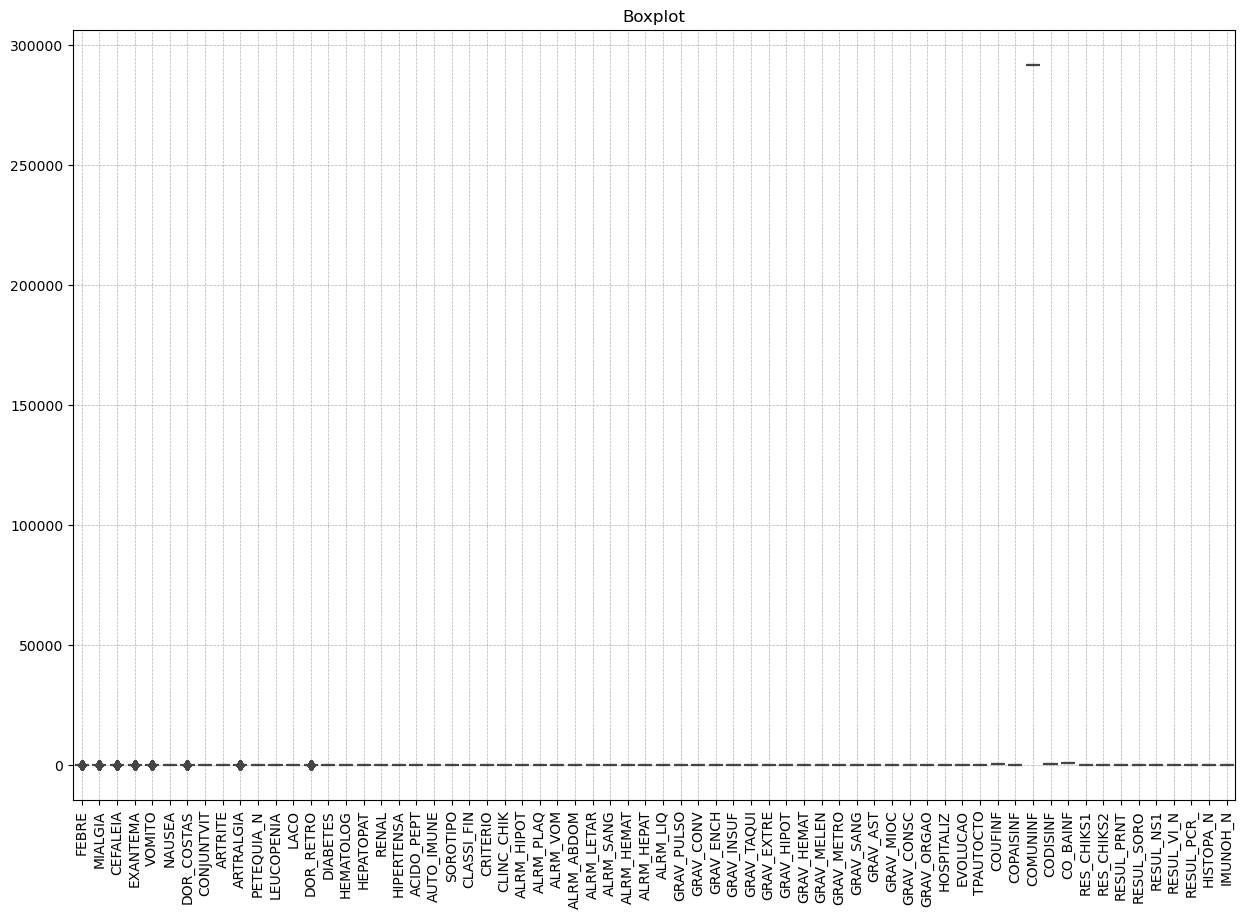

In [13]:
plt.figure(figsize=(15, 10))
sns.boxplot(data= novabase_numerica)
plt.xticks(rotation=90)
plt.title('Boxplot')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(rotation=90)
plt.show()

## Normalização e padronização de dados

In [ ]:
novabase.plot.kde()

In [13]:
valor_minimo = novabase_numerica.min()
valor_maximo = novabase_numerica.max()
desviopadrao = novabase_numerica.std()
media = novabase_numerica.mean()
print(valor_minimo)
print(valor_maximo)
print(desviopadrao)
print(media)

FEBRE         1.000000
MIALGIA       1.000000
CEFALEIA      1.000000
EXANTEMA      1.805247
VOMITO        1.756091
                ...   
RESUL_NS1     3.508795
RESUL_VI_N    3.973565
RESUL_PCR_    3.768521
HISTOPA_N     3.989594
IMUNOH_N      3.989086
Length: 66, dtype: float64
FEBRE         2.000000
MIALGIA       1.264133
CEFALEIA      1.236594
EXANTEMA      2.000000
VOMITO        2.000000
                ...   
RESUL_NS1     3.508795
RESUL_VI_N    4.000000
RESUL_PCR_    4.000000
HISTOPA_N     3.989594
IMUNOH_N      3.989086
Length: 66, dtype: float64
FEBRE         3.239370e-01
MIALGIA       9.836793e-02
CEFALEIA      8.703020e-02
EXANTEMA      7.034289e-02
VOMITO        9.001357e-02
                  ...     
RESUL_NS1     7.138298e-12
RESUL_VI_N    1.157588e-02
RESUL_PCR_    1.014046e-01
HISTOPA_N     3.920690e-11
IMUNOH_N      1.108315e-11
Length: 66, dtype: float64
FEBRE         1.139925
MIALGIA       1.043945
CEFALEIA      1.038173
EXANTEMA      1.969959
VOMITO        1.960328
 

In [15]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
scaler.fit(novabase_numerica)
scaler.transform(novabase_numerica)
novabase_numerica

,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,...,CO_BAINF,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,HISTOPA_N,IMUNOH_N
0,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,NaN,NaN,1.729715,...,621.527458,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
1,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,NaN,NaN,1.729715,...,621.527458,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
2,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.0,NaN,...,621.527458,3.314746,3.908719,3.912879,NaN,NaN,4.000000,4.000000,NaN,NaN
3,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,NaN,NaN,1.729715,...,621.527458,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
4,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,NaN,NaN,1.729715,...,621.527458,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620206,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,NaN,NaN,1.729715,...,621.527458,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
620207,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,NaN,NaN,1.729715,...,621.527458,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
620208,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,NaN,NaN,1.729715,...,621.527458,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
620209,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,NaN,NaN,1.729715,...,621.527458,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086


In [21]:
novabase_numerica.describe()

,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,...,CO_BAINF,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,HISTOPA_N,IMUNOH_N
count,620211.000000,477371.000000,492264.000000,514891.000000,488308.000000,620211.000000,471939.000000,519061.0,483138.0,474044.000000,...,5.767630e+05,6.140600e+05,6.153250e+05,6.151950e+05,3.800550e+05,4.387410e+05,618051.000000,602051.000000,4.803870e+05,4.801160e+05
mean,1.139925,1.043945,1.038173,1.969959,1.960328,1.669784,1.953858,2.0,2.0,1.954715,...,6.215275e+02,3.314746e+00,3.908719e+00,3.912879e+00,2.874727e+00,3.508795e+00,3.980402,3.828468,3.989594e+00,3.989086e+00
std,0.323937,0.098368,0.087030,0.070343,0.090014,0.439148,0.102577,0.0,0.0,0.100941,...,2.597292e-09,7.726714e-12,6.691542e-12,4.406701e-12,2.409764e-11,7.138298e-12,0.011576,0.101405,3.920690e-11,1.108315e-11
min,1.000000,1.000000,1.000000,1.805247,1.756091,1.000000,1.725822,2.0,2.0,1.729715,...,6.215275e+02,3.314746e+00,3.908719e+00,3.912879e+00,2.874727e+00,3.508795e+00,3.973565,3.768521,3.989594e+00,3.989086e+00
25%,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.0,2.0,2.000000,...,6.215275e+02,3.314746e+00,3.908719e+00,3.912879e+00,2.874727e+00,3.508795e+00,3.973565,3.768521,3.989594e+00,3.989086e+00
50%,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.0,2.000000,...,6.215275e+02,3.314746e+00,3.908719e+00,3.912879e+00,2.874727e+00,3.508795e+00,3.973565,3.768521,3.989594e+00,3.989086e+00
75%,1.139925,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.0,2.000000,...,6.215275e+02,3.314746e+00,3.908719e+00,3.912879e+00,2.874727e+00,3.508795e+00,4.000000,4.000000,3.989594e+00,3.989086e+00
max,2.000000,1.264133,1.236594,2.000000,2.000000,2.000000,2.000000,2.0,2.0,2.000000,...,6.215275e+02,3.314746e+00,3.908719e+00,3.912879e+00,2.874727e+00,3.508795e+00,4.000000,4.000000,3.989594e+00,3.989086e+00


In [28]:
novabase[[  "FEBRE",
    "MIALGIA",
    "CEFALEIA",
    "EXANTEMA",
    "VOMITO",
    "NAUSEA",
    "DOR_COSTAS",
    "CONJUNTVIT",
    "ARTRITE",
    "ARTRALGIA",
    "PETEQUIA_N",
    "LEUCOPENIA",
    "LACO",
    "DOR_RETRO",
    "DIABETES",
    "HEMATOLOG",
    "HEPATOPAT",
    "RENAL",
    "HIPERTENSA",
    "ACIDO_PEPT",
    "AUTO_IMUNE"]].nunique()

FEBRE         3
MIALGIA       3
CEFALEIA      3
EXANTEMA      3
VOMITO        3
NAUSEA        3
DOR_COSTAS    3
CONJUNTVIT    3
ARTRITE       3
ARTRALGIA     3
PETEQUIA_N    3
LEUCOPENIA    3
LACO          3
DOR_RETRO     3
DIABETES      3
HEMATOLOG     3
HEPATOPAT     3
RENAL         3
HIPERTENSA    3
ACIDO_PEPT    3
AUTO_IMUNE    3
dtype: int64

In [27]:
novabase[[
    "SOROTIPO",
    "RES_CHIKS1",
    "RES_CHIKS2",
    "RESUL_PRNT",
    "RESUL_SORO",
    "RESUL_NS1",
    "RESUL_VI_N",
    "HISTOPA_N",
    "IMUNOH_N",
    "TPAUTOCTO",
    "COUFINF",
    "COPAISINF",
    "COMUNINF",
    "CODISINF",
    "CO_BAINF",
    "NOBAIINF"
]].nunique

<bound method DataFrame.nunique of         SOROTIPO  RES_CHIKS1  RES_CHIKS2  RESUL_PRNT  RESUL_SORO  RESUL_NS1  \
0       1.465917    3.314746    3.908719    3.912879    2.874727   3.508795   
1       1.465917    3.314746    3.908719    3.912879    2.874727   3.508795   
2       1.465917    3.314746    3.908719    3.912879    4.000000   4.000000   
3       1.465917    3.314746    3.908719    3.912879    2.874727   3.508795   
4       1.465917    3.314746    3.908719    3.912879    2.874727   3.508795   
...          ...         ...         ...         ...         ...        ...   
620206  1.465917    3.314746    3.908719    3.912879    2.874727   3.508795   
620207  1.465917    3.314746    3.908719    3.912879    2.874727   3.508795   
620208  1.465917    3.314746    3.908719    3.912879    2.874727   3.508795   
620209  1.465917    3.314746    3.908719    3.912879    2.874727   3.508795   
620210  1.465917    3.314746    3.908719    3.912879    2.874727   3.508795   

        RESUL_VI

In [29]:
base['SOROTIPO'].value_counts()

SOROTIPO
1.0    2464
2.0    2045
4.0      19
3.0       5
Name: count, dtype: int64

In [15]:
for col in novabase_numerica.columns:
    novabase[col] = novabase_numerica[col]

In [16]:
display(novabase)

,ID_AGRAVO,DT_INVEST,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,...,NOBAIINF,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,HISTOPA_N,IMUNOH_N
0,A90,2016-03-05,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,NaN,...,CENTRO,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
1,A90,2016-02-15,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,NaN,...,CENTRO,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
2,A90,2016-03-25,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.0,...,CENTRO,3.314746,3.908719,3.912879,NaN,NaN,4.000000,4.000000,NaN,NaN
3,A90,2016-03-24,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,NaN,...,CENTRO,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
4,A90,2016-03-13,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,NaN,...,CENTRO,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620206,A90,2024-03-11,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,NaN,...,CENTRO,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
620207,A90,2024-03-11,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,NaN,...,CENTRO,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
620208,A90,2024-03-11,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,NaN,...,CENTRO,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086
620209,A90,2024-03-11,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,NaN,...,CENTRO,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,3.989594,3.989086


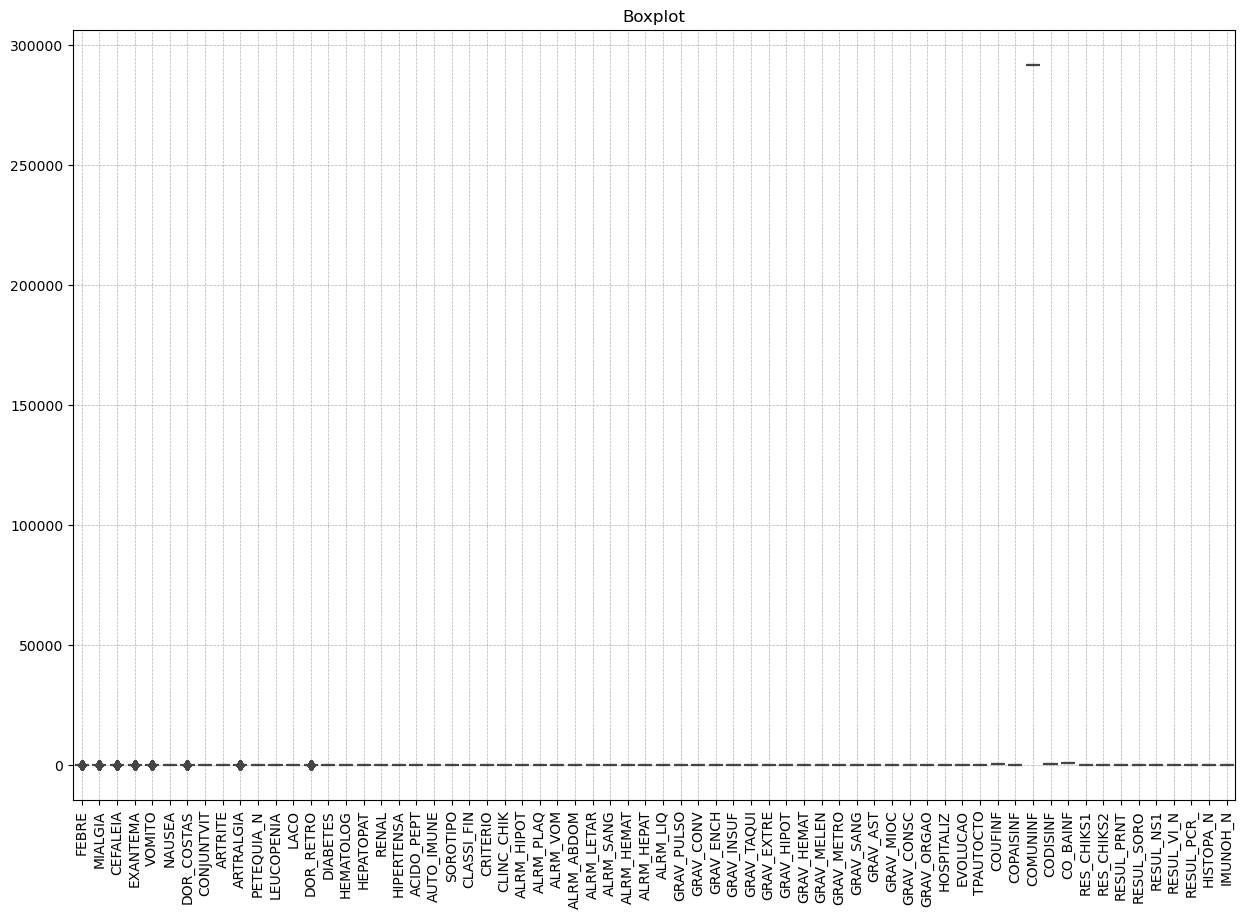

In [17]:
plt.figure(figsize=(15, 10))
sns.boxplot(data= novabase)
plt.xticks(rotation=90)
plt.title('Boxplot')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(rotation=90)
plt.show()

In [19]:
novabase.isnull().sum()

ID_AGRAVO          0
DT_INVEST          0
FEBRE              0
MIALGIA       142840
CEFALEIA      127947
               ...  
RESUL_NS1     181470
RESUL_VI_N      2160
RESUL_PCR_     18160
HISTOPA_N     139824
IMUNOH_N      140095
Length: 72, dtype: int64